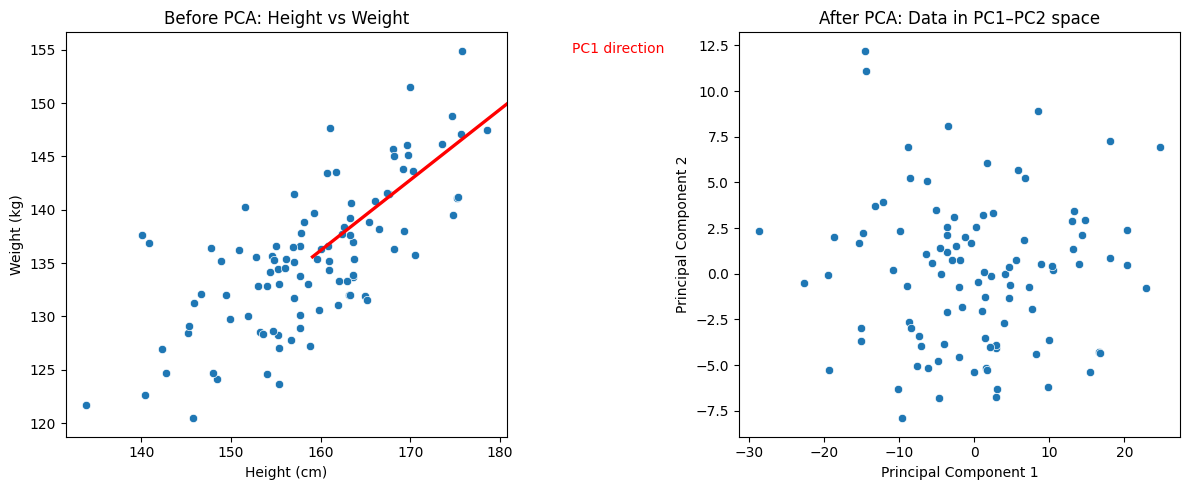

In [1]:
# ============================
# PCA Example (Simple 2D Visualization)
# ============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# 1️⃣ Generate synthetic 2D data (Height vs Weight)
np.random.seed(42)
height = np.random.normal(160, 10, 100)  # mean=160, std=10
weight = height * 0.6 + np.random.normal(0, 5, 100) + 40  # correlated with height

data = pd.DataFrame({
    "Height": height,
    "Weight": weight
})

# 2️⃣ Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Get direction of first principal component
pc1_vector = pca.components_[0] * np.sqrt(pca.explained_variance_[0]) * 3
origin = pca.mean_

# 3️⃣ Plot before and after PCA
plt.figure(figsize=(12, 5))

# Before PCA
plt.subplot(1, 2, 1)
sns.scatterplot(x="Height", y="Weight", data=data)
plt.title("Before PCA: Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")

# Show PC1 direction (red arrow)
plt.quiver(*origin, pc1_vector[0], pc1_vector[1],
           color='red', scale=1, scale_units='xy', angles='xy')
plt.text(origin[0]+pc1_vector[0]*1.1, origin[1]+pc1_vector[1]*1.1,
         "PC1 direction", color='red')

# After PCA
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.title("After PCA: Data in PC1–PC2 space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


Here’s the visual example 👆

Left plot: The original data — Height vs Weight.
You can see the red arrow showing the main direction where data varies the most (that’s the first principal component).

Right plot: The same data after PCA — now expressed in terms of Principal Components (PC1, PC2).
Most of the information is along PC1, meaning we could keep just that one axis to simplify the data!

PCA identifies the axis that accounts for the largest amount of variance in the training
set.